# MNIST Digit Recognizer 

This is my first kernel in computer vision and as a hello world example , I have taken the MNIST dataset for training a CNN model for digit recognizer . I have used Pytorch framework for developing the model . 

### Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook as tqdm

from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
listdir("../input")

['digit-recognizer', 'pretrained-pytorch-models']

In [2]:
### Reading the data
kaggle=1
if kaggle==1:
    train=pd.read_csv("../input/digit-recognizer/train.csv")
    test=pd.read_csv("../input/digit-recognizer/test.csv")
    sample=pd.read_csv("../input/digit-recognizer/sample_submission.csv")
else:
    train=pd.read_csv("train.csv")
    test=pd.read_csv("test.csv")
    sample=pd.read_csv("sample_submission.csv")

In [ ]:
###Glimpse of the data:
train.head()

From the description of the dataset , it is understood that the train dataset has 785 columns and each image is of dimension 28 x 28 . The label column represents the label provided by users and this is the column which we are supposed to predict.

In [ ]:
test.head()

In [ ]:
print(f'Shape of train:{train.shape}\nShape of test:{test.shape}')

In [ ]:
## Check the label :
train.label.value_counts().sort_index()

All the digits seem to be equally represented except for 5 which is ~3800 .

In [3]:
!pip install pretrainedmodels

    100% |████████████████████████████████| 61kB 2.4MB/s ta 0:00:011
  Stored in directory: /tmp/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import pretrainedmodels

In [5]:
## import libraries for our training:
import torch
import torchvision
from torchvision import transforms,datasets,models
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import make_grid
from sklearn.model_selection import train_test_split
from torch.utils.data.sampler import SubsetRandomSampler
from collections import OrderedDict
from torch.autograd import Variable
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image


In [6]:
train_ds,valid_ds=train_test_split(train,random_state=42,test_size=0.2)

In [7]:
## Credits https://www.kaggle.com/juiyangchang/cnn-with-pytorch-0-995-accuracy
## Credits https://www.kaggle.com/artyomp/resnet50-baseline
n_pixels=len(test.columns)
NUM_CLASSES=10
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)

train_trans = transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(num_output_channels=3),transforms.RandomRotation(0.3),
                               transforms.ToTensor(),
                               normalize])

valid_trans = transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(num_output_channels=3),
                               transforms.ToTensor(),
                               normalize])


class data_load():
    
    def __init__(self,file,transform=None):
        
        df = file
        
        if len(df.columns) == n_pixels:
            # test data
            self.X = df.values.reshape((-1,28,28)).astype(np.uint8)[:,:,:,None]
            self.y = None
        else:
            # training data
            self.X = df.iloc[:,1:].values.reshape((-1,28,28)).astype(np.uint8)[:,:,:,None]
            self.y = torch.from_numpy(df.iloc[:,0].values)
            
        self.transform = transform
    
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.transform(self.X[idx]), self.y[idx]
        else:
            return self.transform(self.X[idx])


In [8]:
batch_size=64

train_ds=data_load(train_ds,transform=train_trans)
valid_ds=data_load(valid_ds,transform=valid_trans)
test_ds=data_load(test,transform=valid_trans)



In [9]:
train_loader=torch.utils.data.DataLoader(train_ds,batch_size=batch_size,shuffle=True)
valid_loader=torch.utils.data.DataLoader(valid_ds,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_ds,batch_size=batch_size,shuffle=True)

In [10]:
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    axis.imshow(inp)

torch.Size([64, 3, 28, 28]) torch.Size([64])


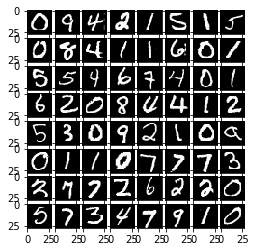

In [11]:
img, label = next(iter(train_loader))
print(img.size(), label.size())
fig = plt.figure(1, figsize=(16,4))
grid = ImageGrid(fig, 111, nrows_ncols=(8,8), axes_pad=0.05)    
for i in range(img.size()[0]):
    ax = grid[i]
    imshow(ax, img[i])


## Building the convolution layer:


Lets use the pretrained resnet architecture for building the ConvNet and check the accuracy.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print("Using device",torch.cuda.get_device_name(0))

The below code is taken from - https://www.kaggle.com/pvlima/use-pretrained-pytorch-models

In [ ]:
# !ls ../input/pretrained-pytorch-models/

In [ ]:
# cache_dir = expanduser(join('~', '.torch'))
# if not exists(cache_dir):
#     makedirs(cache_dir)
# models_dir = join(cache_dir, 'models')
# if not exists(models_dir):
#     makedirs(models_dir)

In [ ]:
# !cp ../input/pretrained-pytorch-models/* ~/.torch/models/

In [ ]:
# !ls ~/.torch/models

In [ ]:
# resnet=models.resnet50(pretrained=True)

In [ ]:
# print(resnet)

In [ ]:
# use_gpu = torch.cuda.is_available()
# inputs, labels = next(iter(train_loader))
# if use_gpu:
#     resnet = resnet.cuda()
#     inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())   
# else:
#     inputs, labels = Variable(inputs), Variable(labels)
# outputs = resnet(inputs)
# outputs.size()

In [ ]:
# We see that the model is working file and it is by default output 1000 classes whereas MNIST has 10 classes . Lets modify the final fc layer to output 10 classes.

In [ ]:
# print(resnet.fc)

In [ ]:
# print(resnet.fc.in_features,resnet.fc.out_features)

In [ ]:
# final_in_features = resnet.fc.in_features
# resnet.fc=nn.Linear(final_in_features,10,bias=True)



In [ ]:
# criterion = torch.nn.CrossEntropyLoss()
# optimizer=torch.optim.Adam(resnet.fc.parameters(),lr=3e-4,betas=(0.9, 0.99), weight_decay=0.0002)
# #optimizer = torch.optim.SGD(resnet.fc.parameters(), lr=0.001, momentum=0.9)
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

# dloaders = {'train':train_loader, 'valid':valid_loader}

In [ ]:
# start_time = time.time()
# model = train_model(dloaders, resnet, criterion, optimizer, exp_lr_scheduler, num_epochs=1)
# print('Training time: {:10f} minutes'.format((time.time()-start_time)/60))

In [ ]:
# #From  https://www.kaggle.com/artgor/pytorch-whale-identifier
# #https://stackoverflow.com/questions/53975717/pytorch-connection-between-loss-backward-and-optimizer-step
# n_epochs = 5
# for epoch in range(1, n_epochs+1):
#     print(time.ctime(), 'Epoch:', epoch)

#     train_loss = []
    

#     for batch_i, (data, target) in enumerate(train_loader):
#         # print(f'Batch {batch_i} of 50')
#         data, target = data.cuda(), target.cuda()
#         resnet=resnet.cuda()
#         optimizer.zero_grad()
#         output = resnet(data)
#         loss = criterion(output, target)
#         train_loss.append(loss.item())

#         loss.backward()
#         optimizer.step()
#     exp_lr_scheduler.step()

#     print(f'Epoch {epoch}, train loss: {np.mean(train_loss):.4f}')

In [ ]:
# resnet=models.resnet50(pretrained=True)

Lets try with our own neural network.

In [ ]:
class MNISTnet(nn.Module):
    def __init__(self):
        super(MNISTnet,self).__init__()
        
        self.cnn_model =nn.Sequential(
            nn.Conv2d(3,32,kernel_size=5,stride=1,padding=2),  # (N,3,28,28) --> (N,32,28,28)
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1), # (N,32,28,28) --> (N,64,28,28)
            nn.MaxPool2d(kernel_size=2,stride=2), # (N,64,28,28) --> (N,64,14,14)
            nn.Dropout(0.5),
            nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1), # (N,64,14,14) --> (N,128,14,14)
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2), # (N,128,14,14) --> (N,128,7,7)
            nn.Dropout(0.5)
        )
        
        self.fc=nn.Sequential(
        nn.Linear(6272,512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512,10))
        
    def forward(self,x):
        #print("Original feature size:",x.shape)
        x=self.cnn_model(x)
        #print("After CNN model feature size",x.shape)
        x=x.view(x.size(0),-1)
        #print("After flattening layer feature size",x.shape)
        x=self.fc(x)
        #print(x.shape)
        
        return x
        

In [ ]:
model=MNISTnet().cuda()
criterion = torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=3e-4)
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

# dloaders = {'train':train_loader, 'valid':valid_loader}

In [ ]:
print(model)

In [14]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10

for epoch in range(max_epochs):

    for i, (inputs,labels) in enumerate(train_loader,0):

        #inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()
       
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Train acc: %0.2f, Valid acc: %0.2f' % (epoch, max_epochs, evaluation(train_loader), evaluation(valid_loader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [ ]:
torch.save(model.state_dict(),'model.ckpt')

In [ ]:
sample.head()
#print(sample.shape)

In [15]:
def prediction(data_loader):
    model.eval()
    test_pred = torch.LongTensor()
    
    for i, data in enumerate(data_loader):
        data = Variable(data, volatile=True)
        if torch.cuda.is_available():
            data = data.cuda()
            
        output = model(data)
        
        pred = output.cpu().data.max(1, keepdim=True)[1]
        test_pred = torch.cat((test_pred, pred), dim=0)
        
    return test_pred

In [ ]:
test_pred=prediction(test_loader)

In [ ]:
sample = pd.DataFrame(np.c_[np.arange(1, len(test_ds)+1)[:,None], test_pred.numpy()], 
                      columns=['ImageId', 'Label'],index=None)

In [ ]:
sample.shape

In [ ]:
sample.to_csv("sample_submission(my mnist).csv",index=False)

In [ ]:
sample.head()

This model scores 0.0971 in the public leaderboard .Going by the train,valid accuracy , the model has terribly overfit.Lets check the pretrained se_resnet50_32x4d model for this dataset.

In [ ]:
#Credits - https://www.kaggle.com/ambarish/icassava-2019-cadene-models-2/notebook
# Thank you Bukun

In [12]:
def se_resnext50_32x4d(pretrained=False):
    pretrained = 'imagenet' if pretrained else None
    model = pretrainedmodels.se_resnext50_32x4d(pretrained=pretrained)
    return model

In [13]:
model = se_resnext50_32x4d(pretrained=True)

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/se_resnext50_32x4d-a260b3a4.pth" to /tmp/.torch/models/se_resnext50_32x4d-a260b3a4.pth
110559176it [05:11, 354996.21it/s]
